In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tabulate import tabulate
from IPython.display import display, HTML
from google.colab import files
import io
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import random
import warnings
warnings. filterwarnings("ignore")
!pip install -U lazyme
from lazyme.string import color_print

  Created wheel for lazyme: filename=lazyme-0.0.27-py3-none-any.whl size=8608 sha256=61d310f571f32cecaec31b68d0cfeea515d73e4f37e05ca46136a6da5c74ec2a
  Stored in directory: /root/.cache/pip/wheels/28/09/53/640fc834063c4cd99f669c02e183d2f0e3aa5dfc81cabe215d
Successfully built lazyme


In [ ]:
def upload_df(dataset_name):

    uploaded = files.upload()
    df = pd.read_csv(io.BytesIO(uploaded[dataset_name]))
    try: 
        df.drop('Unnamed: 0', axis=1, inplace=True)
    except:
        pass
    display(HTML(df.head().to_html()))
    return df

In [ ]:
# upload clustering dataset
df = upload_df('Clustering_df.csv')

Saving Clustering_df.csv to Clustering_df.csv


,Hotel Name,1 2015-08-13,2 2015-08-13,3 2015-08-13,4 2015-08-13,1 2015-08-12,2 2015-08-12,3 2015-08-12,4 2015-08-12,1 2015-08-19,2 2015-08-19,3 2015-08-19,4 2015-08-19,1 2015-09-16,2 2015-09-16,3 2015-09-16,4 2015-09-16,1 2015-09-17,2 2015-09-17,3 2015-09-17,4 2015-09-17,1 2015-08-26,2 2015-08-26,3 2015-08-26,4 2015-08-26,1 2015-09-11,2 2015-09-11,3 2015-09-11,4 2015-09-11,1 2015-09-18,2 2015-09-18,3 2015-09-18,4 2015-09-18,1 2015-08-27,2 2015-08-27,3 2015-08-27,4 2015-08-27,1 2015-09-09,2 2015-09-09,3 2015-09-09,4 2015-09-09,1 2015-08-28,2 2015-08-28,3 2015-08-28,4 2015-08-28,1 2015-09-10,2 2015-09-10,3 2015-09-10,4 2015-09-10,1 2015-09-30,2 2015-09-30,3 2015-09-30,4 2015-09-30,1 2015-10-01,2 2015-10-01,3 2015-10-01,4 2015-10-01,1 2015-10-02,2 2015-10-02,3 2015-10-02,4 2015-10-02,1 2015-10-07,2 2015-10-07,3 2015-10-07,4 2015-10-07,1 2015-10-14,2 2015-10-14,3 2015-10-14,4 2015-10-14,1 2015-10-15,2 2015-10-15,3 2015-10-15,4 2015-10-15,1 2015-10-16,2 2015-10-16,3 2015-10-16,4 2015-10-16,1 2015-10-21,2 2015-10-21,3 2015-10-21,4 2015-10-21,1 2015-10-22,2 2015-10-22,3 2015-10-22,4 2015-10-22,1 2015-10-27,2 2015-10-27,3 2015-10-27,4 2015-10-27,1 2015-10-28,2 2015-10-28,3 2015-10-28,4 2015-10-28,1 2015-10-29,2 2015-10-29,3 2015-10-29,4 2015-10-29,1 2015-10-30,2 2015-10-30,3 2015-10-30,4 2015-10-30,1 2015-11-03,2 2015-11-03,3 2015-11-03,4 2015-11-03,1 2015-11-04,2 2015-11-04,3 2015-11-04,4 2015-11-04,1 2015-11-05,2 2015-11-05,3 2015-11-05,4 2015-11-05,1 2015-11-06,2 2015-11-06,3 2015-11-06,4 2015-11-06,1 2015-11-07,2 2015-11-07,3 2015-11-07,4 2015-11-07,1 2015-11-10,2 2015-11-10,3 2015-11-10,4 2015-11-10,1 2015-11-11,2 2015-11-11,3 2015-11-11,4 2015-11-11,1 2015-11-12,2 2015-11-12,3 2015-11-12,4 2015-11-12,1 2015-11-13,2 2015-11-13,3 2015-11-13,4 2015-11-13,1 2015-11-18,2 2015-11-18,3 2015-11-18,4 2015-11-18,1 2015-11-20,2 2015-11-20,3 2015-11-20,4 2015-11-20,1 2015-11-21,2 2015-11-21,3 2015-11-21,4 2015-11-21,1 2015-11-26,2 2015-11-26,3 2015-11-26,4 2015-11-26,1 2015-11-27,2 2015-11-27,3 2015-11-27,4 2015-11-27,1 2015-11-28,2 2015-11-28,3 2015-11-28,4 2015-11-28
0,Aloft Harlem,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,11.607311,12.25914,0.0,16.982694,16.982694,16.982694,16.982694,28.377424,37.097320,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,57.175868,66.584321,75.781089,-1.000000,-1.000000,59.300700,-1.0,75.781089,-1.000000,37.097320,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,51.410131,-1.0,39.225786,-1.000000,53.046648,-1.000000,-1.000000,-1.000000,48.656024,-1.000000,-1.0,47.730489,-1.0,-1.000000,100.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.0,85.719062,-1.000000,-1.000000,-1.0,25.530934,-1.000000,-1.000000,-1.000000,65.043160,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1,Andaz 5th Avenue - a concept by Hyatt,-1.0,-1.0,-1.0,0.0,-1.000000,-1.000000,27.657946,-1.0,-1.0,-1.0,-1.0,52.691382,-1.0,-1.0,84.666778,91.347512,58.082972,68.611262,72.525423,97.430425,-1.0,-1.0,-1.0,-1.0,61.573647,80.009244,75.383813,-1.0,49.394357,81.014622,61.690309,52.566145,-1.000000,-1.0,27.123188,-1.0,-1.0,-1.0,99.611377,-1.0,-1.0,-1.000000,-1.00000,-1.0,71.125860,-1.000000,-1.000000,-1.000000,-1.000000,78.486086,80.009244,-1.0,62.155888,72.203814,97.430425,92.496193,59.810725,-1.000000,77.974

In [ ]:
class Model:
    name = ''
    model = None
    score = 0.0
    clusters = 0

    def __init__(self, name):
        self.name = name
        self.num_of_hotels_per_cluster = []


class FindClusters:
    def __init__(self, df):
        self.df = df
        self.models_map = {}
        self.clustering_models = {'agglomerative': ['ward', 'complete', 'average', 'single'], 'others': ['KMeans', 'GaussianMixture']}
        self.search_range = range(2, 11)

    def run(self):
        for key, val in self.clustering_models.items():
            for model in val:
                self.models_map[model] = self.get_best_model(model)
                self.print_by_clusters(self.models_map[model])
                self.visual_dendrogram(self.models_map[model].name) if key == 'agglomerative' else None
                print('\n'*7)

    def get_best_model(self, model_name):
        best = 0
        max = 0.0
        best_model = Model(model_name)
        # check which n_clusters gives the best silhouette_score
        for i in self.search_range:
            if model_name == 'KMeans':
                model = KMeans(n_clusters=i).fit(self.df.drop(columns = ['Hotel Name']))
                labels = model.labels_
            elif model_name == 'GaussianMixture':
                model = GaussianMixture(n_components=i).fit(self.df.drop(columns = ['Hotel Name'])).predict(self.df.drop(columns = ['Hotel Name']))
                labels = model
            else:
                model = AgglomerativeClustering(n_clusters=i, linkage=model_name).fit(self.df.drop(columns = ['Hotel Name']))
                labels = model.labels_
            s = silhouette_score(self.df.drop(columns = ['Hotel Name']), labels)
            if s > max:
                max = s
                best = i
                best_model.model = model
        
        to_print = model_name.upper() + " - The highest silhouette score is with cluster number of: " + str(best)
        color_print(to_print, color='black', highlight='yellow', bold=True)
        best_model.score = max
        best_model.clusters = best
        return best_model

    def visual_dendrogram(self, method):
        plt.figure(figsize=(10, 5))  
        plt.title("Clustering Hotels Dendrogram for - " + method) 
        Z = shc.linkage(self.df.drop(columns = ['Hotel Name']), method=method)
        # dend = shc.dendrogram(Z, labels=self.df['Hotel Name'].tolist()) 
        dend = shc.dendrogram(Z)  
        plt.show(dend)

    def print_by_clusters(self, Model):
        x = Model.model.labels_ if hasattr(Model.model, 'labels_') else Model.model
        d_f_ward = pd.DataFrame([self.df['Hotel Name'].tolist(), x]).T
        d_f_ward.columns = ['hotel','Cluster']
        grouped_df = d_f_ward.groupby('Cluster')
        for key, item in grouped_df:
            l_item = list(item['hotel'])
            Model.num_of_hotels_per_cluster.append(len(l_item))
            to_print = "cluster {}".format(key) + " contains {}".format(len(l_item)) + " hotels, which is {}".format((len(l_item)/len(d_f_ward))*100) + " % of all hotels"
            color_print(to_print, color='pink', bold=True)
            color_print('hotels:\n', color='red', bold=True)
            print(l_item)
            print('\n')

    def comper_clustering_models(self):
        comp_df = pd.DataFrame(columns = ('Model Name', 'Silhouette Score', 'Clusters', 'Hotels per cluster'))
        for i in self.models_map:
            row = {'Model Name': i, 'Silhouette Score': self.models_map[i].score, 'Clusters': self.models_map[i].clusters,
                  'Hotels per cluster': self.models_map[i].num_of_hotels_per_cluster}
            comp_df = comp_df.append(row, ignore_index=True)
        display(HTML(comp_df.to_html()))  

    def get_models_map(self):
        return self.models_map

# **Run clustering models**


*   agglomerative clustering models **['ward', 'complete', 'average', 'single']**
*   clustering models **['KMeans', 'GaussianMixture']**



WARD - The highest silhouette score is with cluster number of: 2
cluster 0 contains 96 hotels, which is 64.42953020134227 % of all hotels
hotels:

['Aloft Harlem', 'Baccarat Hotel and Residences New York', 'Bentley Hotel', 'Best Western Bayside Inn', 'Best Western Bowery Hanbee Hotel', 'Best Western Plus Arena Hotel', 'Best Western Plus Newark Airport West', 'Blakely New York', 'Chelsea Inn', 'Comfort Inn Times Square South Area', 'Courtyard New York Manhattan Times Square West', 'Courtyard Newark Elizabeth', 'Courtyard by Marriott New York City Manhattan Fifth Avenue', 'Courtyard by Marriott New York Manhattan   Central Park', 'Courtyard by Marriott New York Manhattan SoHo', 'Courtyard by Marriott New York Manhattan Times Square', 'Courtyard by Marriott New York Manhattan Upper East Side', 'Crowne Plaza Times Square Manhattan', 'Days Inn Bronx Near Stadium', 'DoubleTree Suites by Hilton New York City - Times Square', 'DoubleTree by Hilton Hotel New York - Times Square South', 'DoubleT

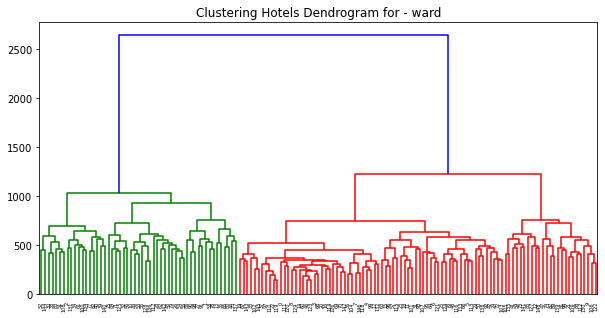









COMPLETE - The highest silhouette score is with cluster number of: 2
cluster 0 contains 118 hotels, which is 79.19463087248322 % of all hotels
hotels:

['Aloft Harlem', 'Andaz 5th Avenue - a concept by Hyatt', 'Andaz Wall Street - a concept by Hyatt', 'Baccarat Hotel and Residences New York', 'Bentley Hotel', 'Best Western Bayside Inn', 'Best Western Bowery Hanbee Hotel', 'Best Western Plus Arena Hotel', 'Best Western Plus Newark Airport West', 'Blakely New York', 'Chelsea Inn', 'Comfort Inn Times Square South Area', 'Courtyard New York Manhattan Times Square West', 'Courtyard Newark Elizabeth', 'Courtyard by Marriott New York City Manhattan Fifth Avenue', 'Courtyard by Marriott New York Manhattan   Central Park', 'Courtyard by Marriott New York Manhattan SoHo', 'Courtyard by Marriott New York Manhattan Times Square', 'Courtyard by Marriott New York Manhattan Upper East Side', 'Crowne Plaza Times Square Manhattan', 'Days Inn Bronx Near Stadium', 'DoubleTree Suites by Hilton New

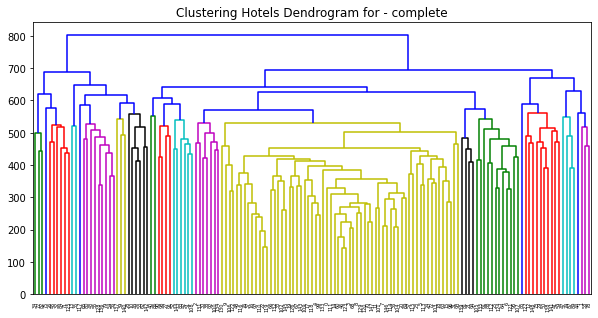









AVERAGE - The highest silhouette score is with cluster number of: 2
cluster 0 contains 39 hotels, which is 26.174496644295303 % of all hotels
hotels:

['Andaz 5th Avenue - a concept by Hyatt', 'Cassa Hotel 45th Street', 'Conrad New York', 'DoubleTree by Hilton Metropolitan - New York City', 'DoubleTree by Hilton New York City - Chelsea', 'DoubleTree by Hilton New York City - Financial District', 'Four Seasons Hotel New York', 'Grand Hyatt New York', 'Hampton Inn Manhattan Downtown-Financial District', 'Hampton Inn Manhattan Soho', 'Hampton Inn Manhattan United Nations', 'Hampton Inn Manhattan-Seaport-Financial District', 'Hampton Inn New York - 35th Street - Empire State Building', 'Hilton Garden Inn New York Central Park South-Midtown West', 'Hilton Garden Inn New York Midtown Park Ave', 'Hilton Garden Inn New York West 35th Street', 'Hilton Garden Inn New York-Times Square Central', 'Hilton Garden Inn Times Square', 'Hilton Manhattan East', 'Hilton Times Square', 'Homewood Su

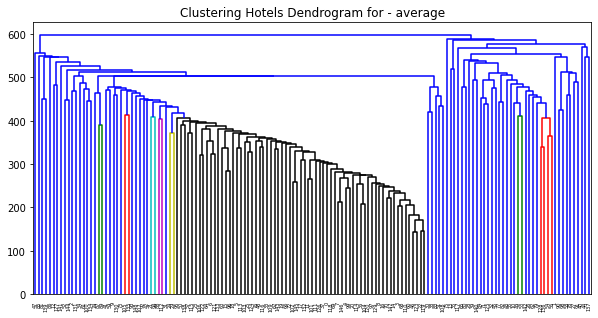









SINGLE - The highest silhouette score is with cluster number of: 2
cluster 0 contains 148 hotels, which is 99.32885906040269 % of all hotels
hotels:

['Aloft Harlem', 'Andaz 5th Avenue - a concept by Hyatt', 'Andaz Wall Street - a concept by Hyatt', 'Baccarat Hotel and Residences New York', 'Bentley Hotel', 'Best Western Bayside Inn', 'Best Western Bowery Hanbee Hotel', 'Best Western Plus Arena Hotel', 'Best Western Plus Newark Airport West', 'Blakely New York', 'Cassa Hotel 45th Street', 'Chelsea Inn', 'Comfort Inn Times Square South Area', 'Courtyard New York Manhattan Times Square West', 'Courtyard Newark Elizabeth', 'Courtyard by Marriott New York City Manhattan Fifth Avenue', 'Courtyard by Marriott New York Manhattan   Central Park', 'Courtyard by Marriott New York Manhattan SoHo', 'Courtyard by Marriott New York Manhattan Times Square', 'Courtyard by Marriott New York Manhattan Upper East Side', 'Crowne Plaza Times Square Manhattan', 'Days Inn Bronx Near Stadium', 'Double

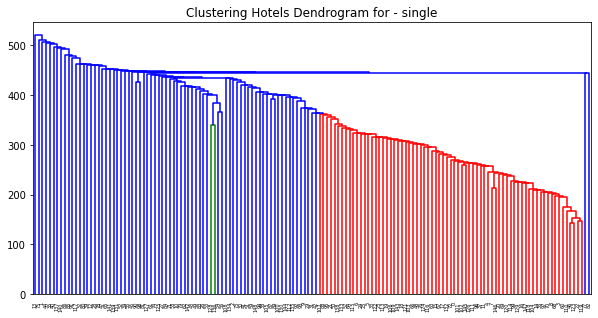









KMEANS - The highest silhouette score is with cluster number of: 2
cluster 0 contains 91 hotels, which is 61.07382550335571 % of all hotels
hotels:

['Aloft Harlem', 'Baccarat Hotel and Residences New York', 'Bentley Hotel', 'Best Western Bayside Inn', 'Best Western Bowery Hanbee Hotel', 'Best Western Plus Arena Hotel', 'Best Western Plus Newark Airport West', 'Blakely New York', 'Chelsea Inn', 'Comfort Inn Times Square South Area', 'Courtyard New York Manhattan Times Square West', 'Courtyard Newark Elizabeth', 'Courtyard by Marriott New York City Manhattan Fifth Avenue', 'Courtyard by Marriott New York Manhattan   Central Park', 'Courtyard by Marriott New York Manhattan SoHo', 'Courtyard by Marriott New York Manhattan Times Square', 'Courtyard by Marriott New York Manhattan Upper East Side', 'Crowne Plaza Times Square Manhattan', 'Days Inn Bronx Near Stadium', 'DoubleTree Suites by Hilton New York City - Times Square', 'DoubleTree by Hilton Hotel New York - Times Square South'

In [ ]:
find_clusters = FindClusters(df)
find_clusters.run()

In [ ]:
# Print differences between the clustering types
find_clusters.comper_clustering_models()

,Model Name,Silhouette Score,Clusters,Hotels per cluster
0,ward,0.195748,2,"[96, 53]"
1,complete,0.205876,2,"[118, 31]"
2,average,0.211684,2,"[39, 110]"
3,single,0.229274,2,"[148, 1]"
4,KMeans,0.198121,2,"[91, 58]"
5,GaussianMixture,0.198802,2,"[92, 57]"


# **PCA & exploration**

In [ ]:
class PCABeforeAndAfterGmm:

    def __init__(self, models_map):
        # get 50 hotels as samples 
        self.samples = df.drop(columns = ['Hotel Name']).sample(n = 50)
        #get 50 random hotels in order to display their name on the plot
        self.rand = random.sample(range(0, len(df.drop(columns = ['Hotel Name']))), 20)
        self.reduced_data = None
        self.models_map = models_map

    def pca_after_gmm(self):
        pca = PCA(n_components=2).fit(self.samples)
        cv = pca.explained_variance_ratio_
        print("The Cumulative Variance is:", cv[0] + cv[1])
        self.reduced_data = pca.transform(df.drop(columns = ['Hotel Name']))
        self.reduced_data = pd.DataFrame(self.reduced_data, columns=['PCA 1', 'PCA 2'])
        self.plot_graph("PCA after GMM-Clustering", self.models_map['GaussianMixture'].model)   

    def pca_before_gmm(self):  
        #we use the reduced_data (which is after PCA) to fit the GMM
        gmm = GaussianMixture(n_components=2).fit(self.reduced_data)
        model = gmm.predict(self.reduced_data)
        self.plot_graph("PCA before GMM-Clustering", model)   

    def plot_graph(self, _title, model):
        plt.figure(figsize=(14,7))
        ax = sns.scatterplot(self.reduced_data['PCA 1'], self.reduced_data['PCA 2'], hue=model, s=100)
        # display the names of 50 random hotels
        for i, txt in enumerate(df['Hotel Name']):
            if i in self.rand:
                plt.annotate(txt, xy=(self.reduced_data['PCA 1'][i], self.reduced_data['PCA 2'][i]),
                            xytext=(40, 20), textcoords='offset points', ha='right', va='bottom', 
                            bbox=dict(boxstyle='round,pad=0.3', fc="white", ec="black", lw=0.2), 
                            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.3', color='black'))
        plt.title(_title)
        plt.legend(title="Cluster No.")
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.show()

The Cumulative Variance is: 0.29579350526013465


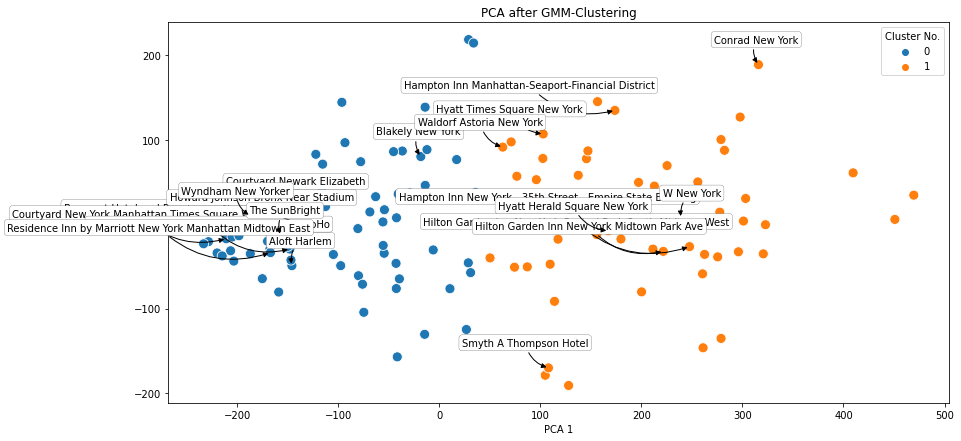

In [ ]:
pca_before_and_after_gmm = PCABeforeAndAfterGmm(find_clusters.get_models_map())
pca_before_and_after_gmm.pca_after_gmm()

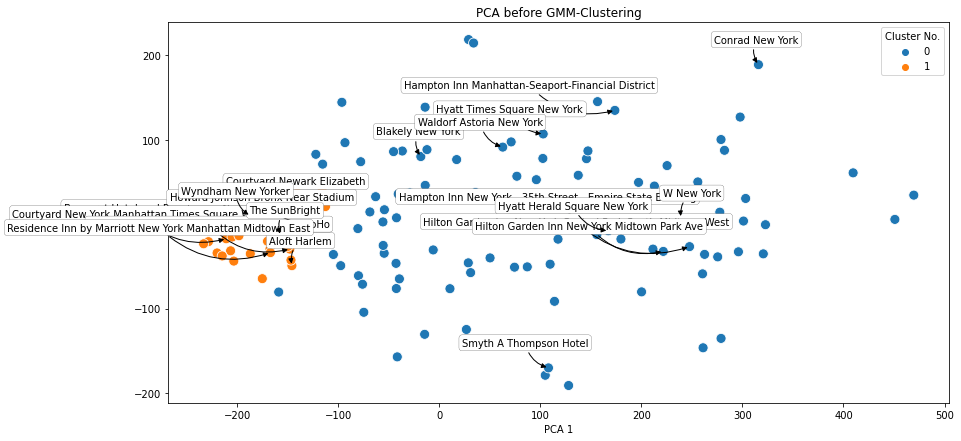

In [ ]:
pca_before_and_after_gmm.pca_before_gmm()

In [ ]:
class Exploration:

    def __init__(self, models_map):
        self.models_map = models_map
        self.d_f_gmm = df.drop(columns = ['Hotel Name']).copy()
        self.d_f_gmm.index = df['Hotel Name']
        self.d_f_gmm['Cluster'] = self.models_map['GaussianMixture'].model
        self.sampl_per_cluster = None

    def show_statistics(self):
        # describe 2 random hotels from each cluster
        self.sampl_per_cluster = self.d_f_gmm.groupby('Cluster').apply(lambda x: x.sample(2)).T
        display(HTML(self.sampl_per_cluster.describe().to_html()))

    def plot_statistics_graphs(self):
        # plot graph for each one of the 4 samples
        f, axes = plt.subplots(1, 4, figsize=(20, 3), sharex=True)
        sns.distplot(self.sampl_per_cluster.T[:1], color="skyblue", ax=axes[0]).set_title(self.sampl_per_cluster.T[:1].index[0])
        sns.distplot(self.sampl_per_cluster.T[1:2], color="olive", ax=axes[1]).set_title(self.sampl_per_cluster.T[1:2].index[0])
        sns.distplot(self.sampl_per_cluster.T[2:3], color="orange", ax=axes[2]).set_title(self.sampl_per_cluster.T[2:3].index[0])
        sns.distplot(self.sampl_per_cluster.T[3:], color="gold", ax=axes[3]).set_title(self.sampl_per_cluster.T[3:].index[0])
        plt.show()

In [ ]:
# describe 2 random hotels from each cluster
exploration = Exploration(find_clusters.get_models_map())
exploration.show_statistics()

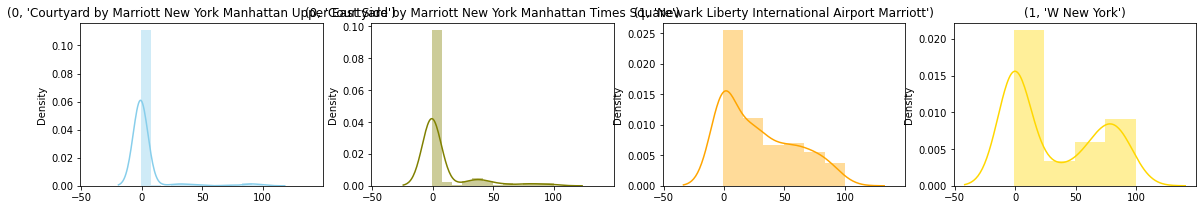

In [ ]:
# plot graph for each one of the 4 samples
exploration.plot_statistics_graphs()